In [1]:
#Imports
import pandas as pd
import numpy as np 

### general

In [2]:
# Load the csv files
crashes_df = pd.read_csv('../data/Crashes.csv')

In [100]:
crashes_df.shape

(257925, 36)

In [101]:
crashes_df.columns

Index(['RD_NO', 'CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
       'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'LOCATION'],
      dtype='object')

In [102]:
# Create a dictionary of columns with missing values and their counts
missing_values_dict = crashes_df.isna().sum()[crashes_df.isna().sum() > 0].to_dict()
missing_values_dict

{'REPORT_TYPE': 4996,
 'STREET_DIRECTION': 2,
 'STREET_NAME': 1,
 'BEAT_OF_OCCURRENCE': 4,
 'MOST_SEVERE_INJURY': 7,
 'LATITUDE': 1022,
 'LONGITUDE': 1022,
 'LOCATION': 1022}

In [103]:
crashes_df.duplicated().sum()

0

### value count on missing values columns

check all the values of each column using valueCount and check if there are columns that use a string to signal that the data is not known (e.g. weather condition just below)

In [104]:
crashes_df.groupby('WEATHER_CONDITION').size()

WEATHER_CONDITION
CLEAR                     205435
CLOUDY/OVERCAST             7573
FOG/SMOKE/HAZE               549
OTHER                        775
RAIN                       23677
SEVERE CROSS WIND GATE        49
SLEET/HAIL                   342
SNOW                        8276
UNKNOWN                    11249
dtype: int64

In [105]:
for col in crashes_df.columns:
    print (col)
    print (crashes_df[col].value_counts())
    print ("_______________________________________________________")

RD_NO
JC113649    1
JA338203    1
JA338376    1
JA338333    1
JA338644    1
           ..
JB233132    1
JB233590    1
JB233252    1
JB233122    1
JB442550    1
Name: RD_NO, Length: 257925, dtype: int64
_______________________________________________________
CRASH_DATE
11/10/2017 10:30:00 AM    27
11/10/2017 10:00:00 AM    20
09/04/2018 08:00:00 AM    16
01/25/2018 08:00:00 AM    15
10/10/2018 03:30:00 PM    15
                          ..
02/15/2018 04:32:00 PM     1
02/15/2018 04:40:00 PM     1
02/15/2018 04:50:00 PM     1
02/15/2018 05:03:00 PM     1
01/18/2014 06:14:00 PM     1
Name: CRASH_DATE, Length: 166465, dtype: int64
_______________________________________________________
POSTED_SPEED_LIMIT
30    190992
35     17327
25     15012
20      9405
15      8177
0       5617
10      4509
5       2514
40      2264
45      1489
55       239
9         83
99        67
3         54
50        46
39        29
1         24
60        16
2         16
65         7
32         7
33         6
24  

the columns that use a replacement string for null values are:
- TRAFFIC_CONTROL_DEVICE
- DEVICE_CONDITION
- WEATHER_CONDITION
- LIGHTING_CONDITION
- TRAFFICWAY_TYPE
- ROADWAY_SURFACE_COND
- ROAD_DEFECT

In [106]:
columns_with_strings_to_signal_missing_values = [
    'TRAFFIC_CONTROL_DEVICE',
    'DEVICE_CONDITION',
    'WEATHER_CONDITION',
    'LIGHTING_CONDITION',
    'TRAFFICWAY_TYPE',
    'ROADWAY_SURFACE_COND',
    'ROAD_DEFECT'
]

# Iterating over the list to print value counts
for col in columns_with_strings_to_signal_missing_values:
    print(f"Value counts for {col}:")
    print(crashes_df[col].value_counts())
    print("_______________________________________________________")


Value counts for TRAFFIC_CONTROL_DEVICE:
NO CONTROLS                148894
TRAFFIC SIGNAL              72072
STOP SIGN/FLASHER           24877
UNKNOWN                      8312
OTHER                        1441
LANE USE MARKING             1080
YIELD                         343
OTHER WARNING SIGN            197
OTHER REG. SIGN               186
RAILROAD CROSSING GATE        180
SCHOOL ZONE                   112
POLICE/FLAGMAN                 96
DELINEATORS                    63
OTHER RAILROAD CROSSING        62
NO PASSING                     10
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64
_______________________________________________________
Value counts for DEVICE_CONDITION:
NO CONTROLS                 150267
FUNCTIONING PROPERLY         89443
UNKNOWN                      13781
OTHER                         1808
FUNCTIONING IMPROPERLY        1586
NOT FUNCTIONING                870
WORN REFLECTIVE MATERIAL       137
MISSING                         33
Name: DEVICE_CONDITION, dtype: int6

decided not to perform any change based on this results

### columns that we think it's interesting to plot

- CRASH_HOUR
- CRASH_DAY_OF_WEEK
- CRASH_MONTH
- CRASH_DATE (kinda the same as the aboves)
- POSTED_SPEED_LIMIT
- TRAFFIC_CONTROL_DEVICE (not a number but there ain't that many)
- WEATHER_CONDITION 
- LIGHTING_CONDITION
- FIRST_CRASH_TYPE (not a number but there ain't that many)
- TRAFFICWAY_TYPE
- ALIGNMENT
- ROADWAY_SURFACE_COND
- ROAD_DEFECT
- MOST_SEVERE_INJURY
- PRIM_CONTRIBUTORY_CAUSE
- SEC_CONTRIBUTORY_CAUSE

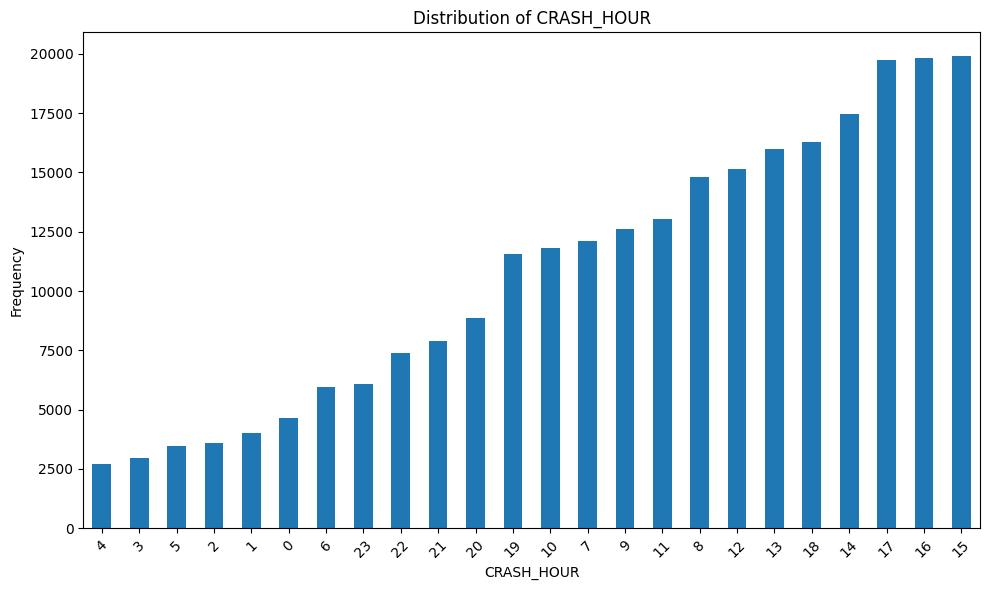

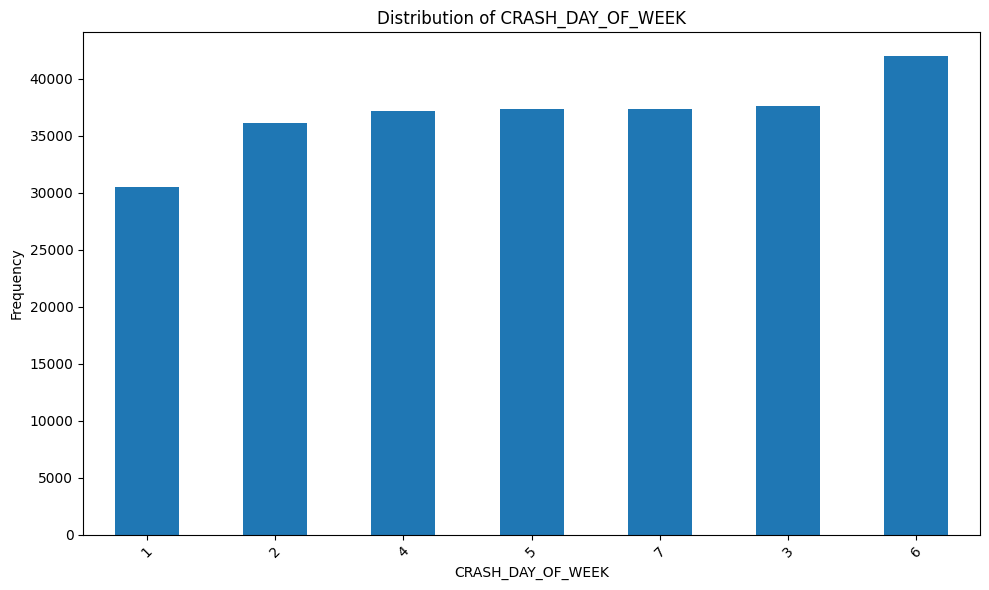

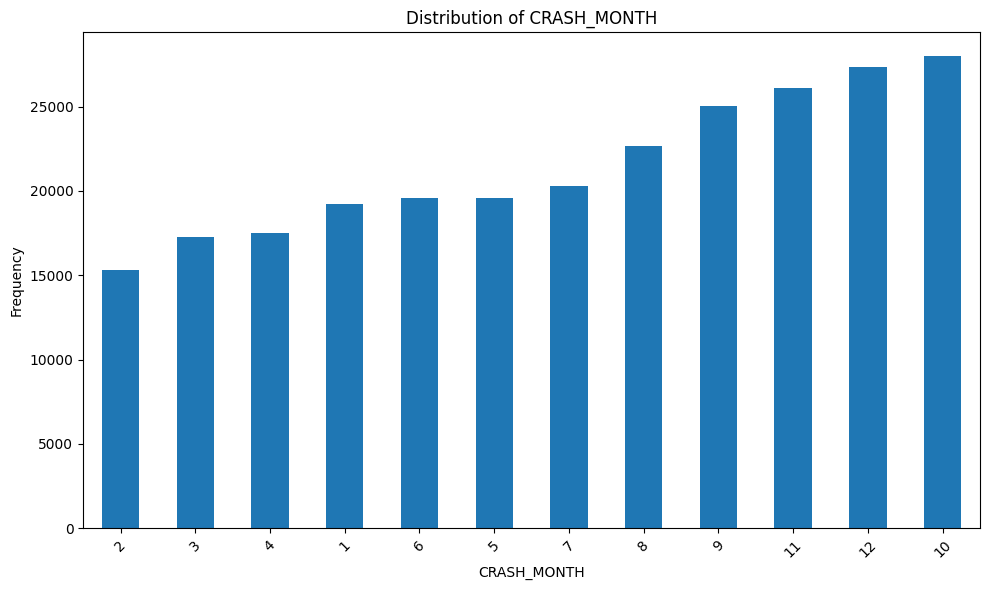

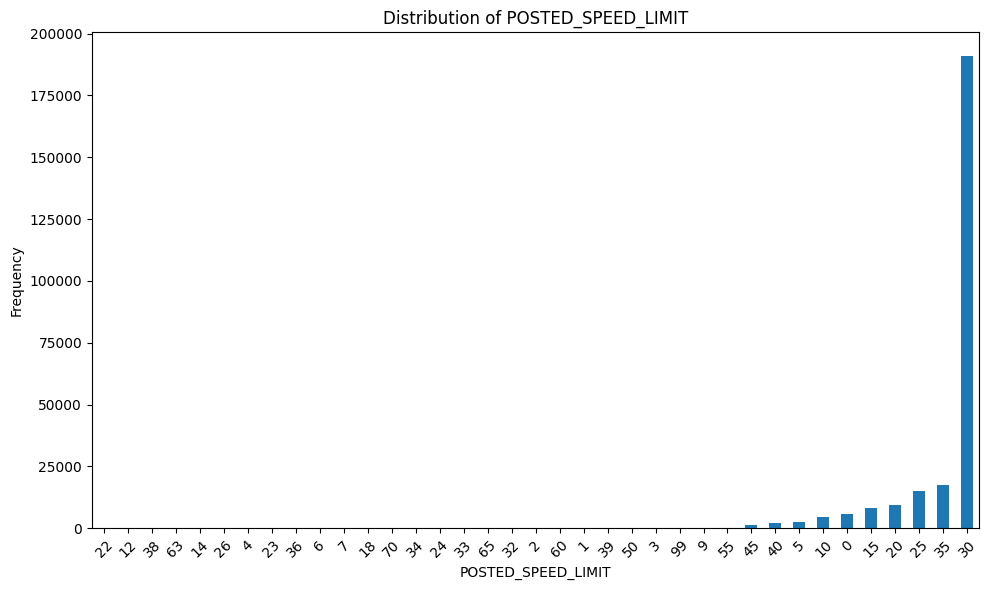

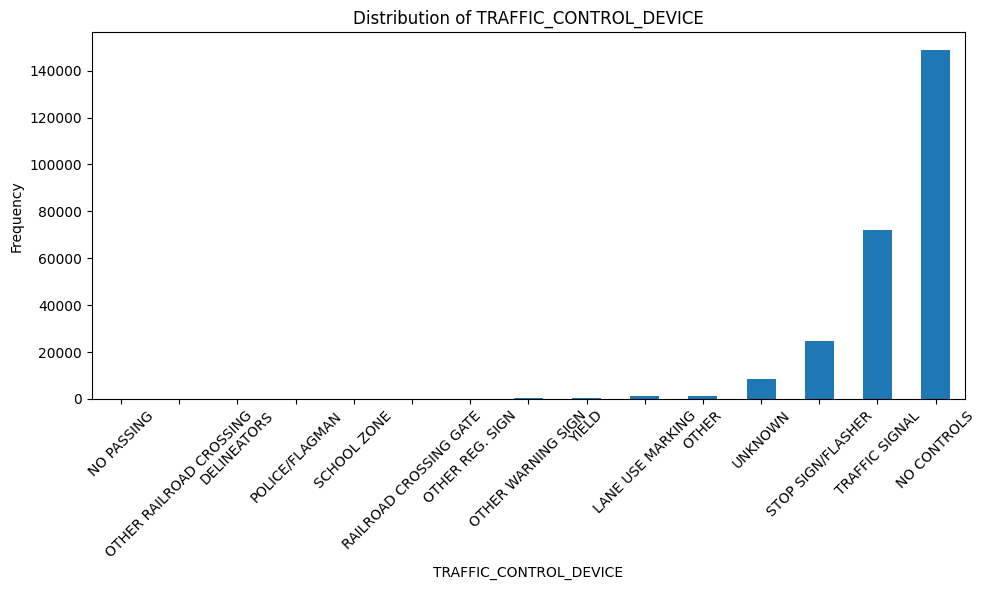

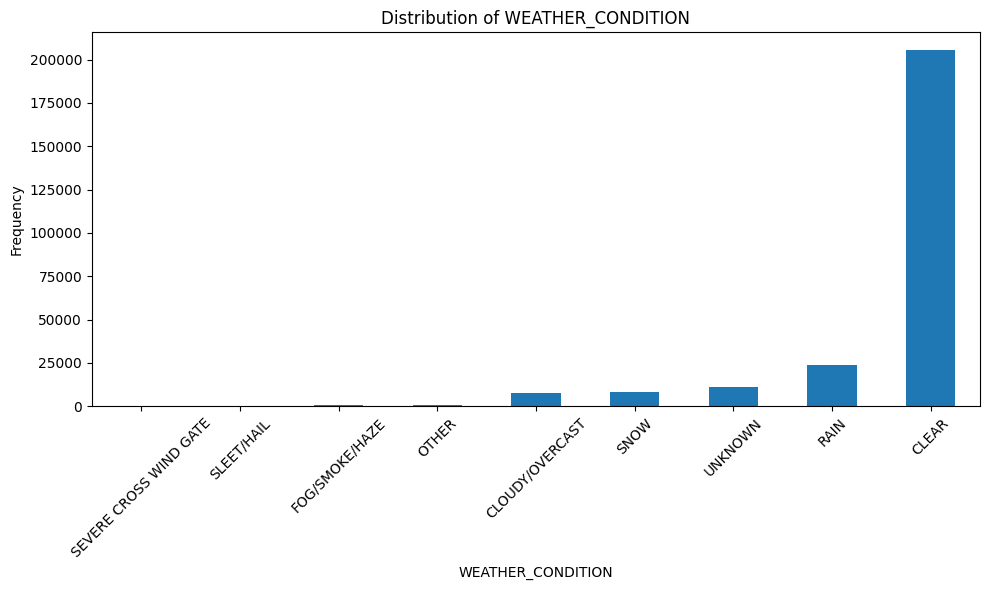

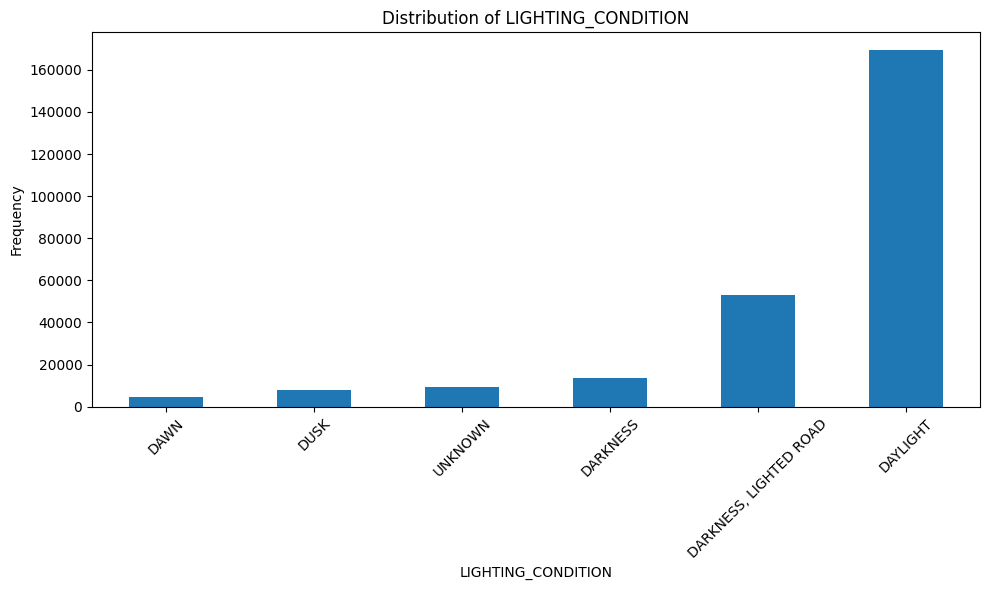

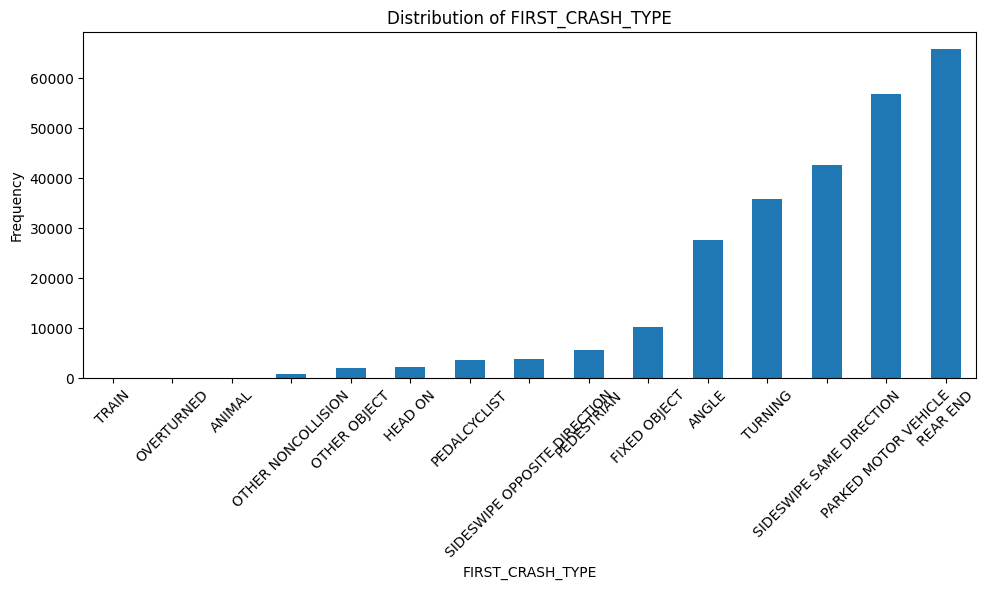

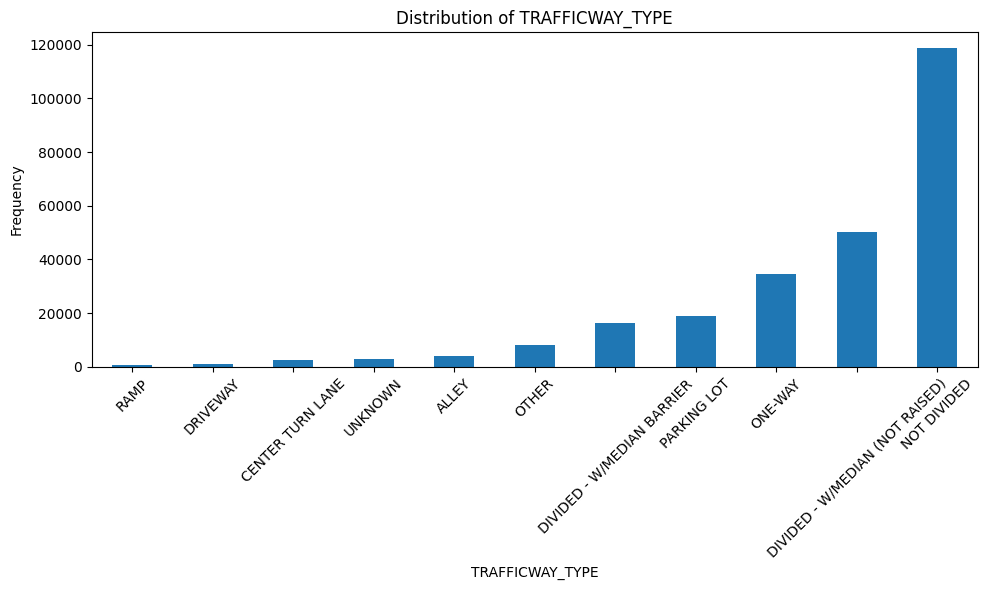

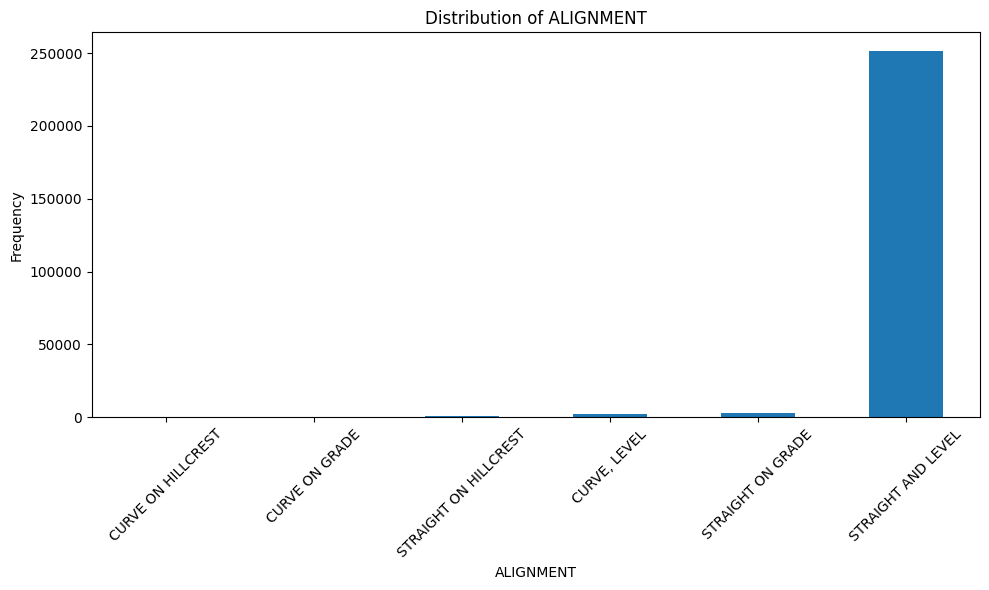

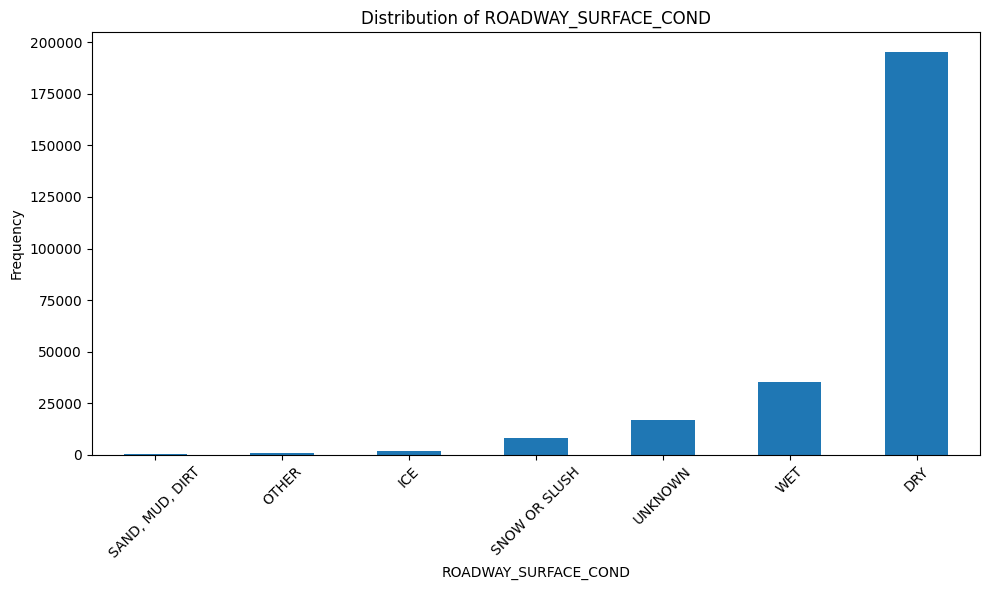

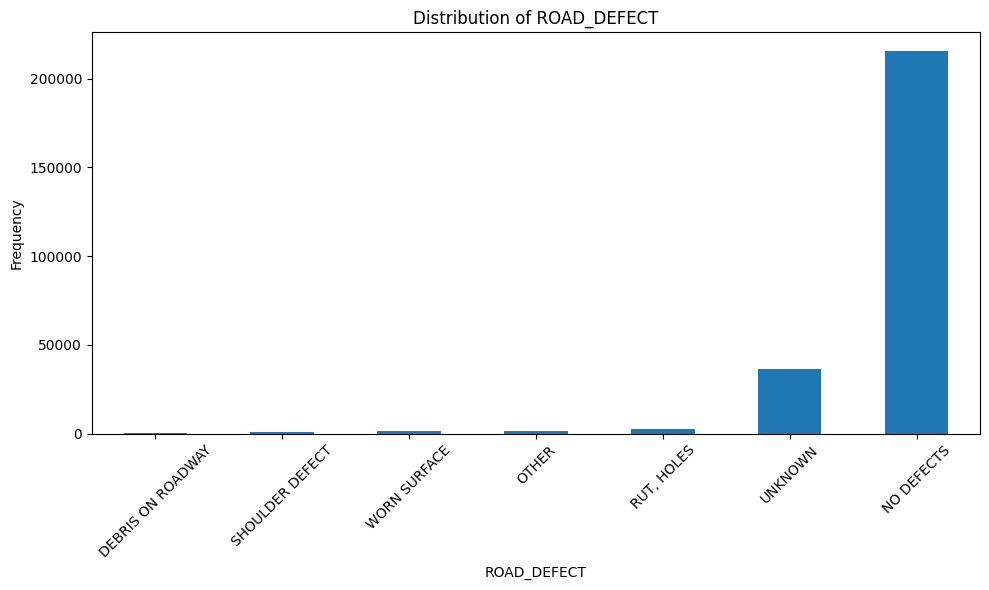

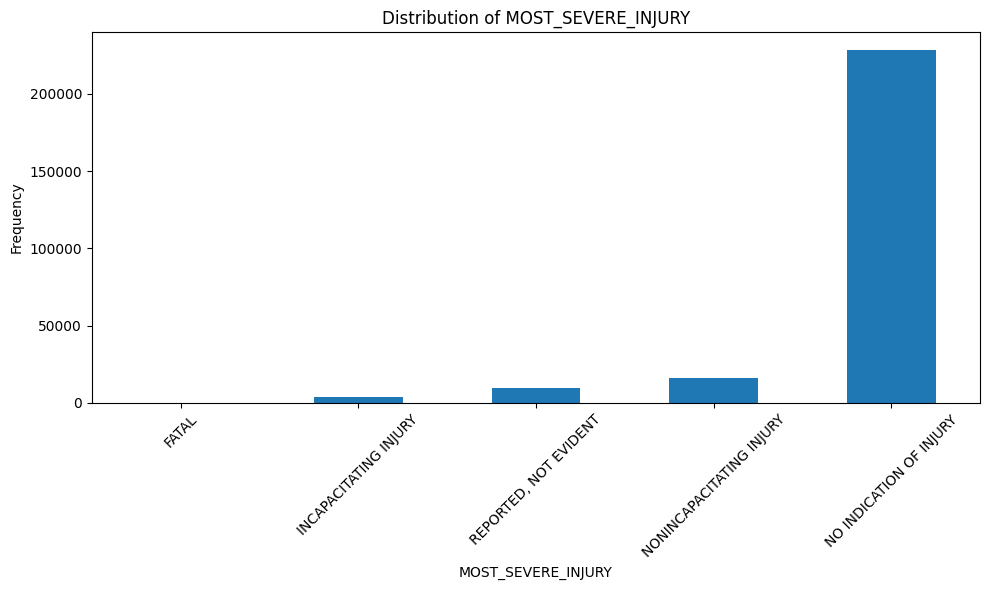

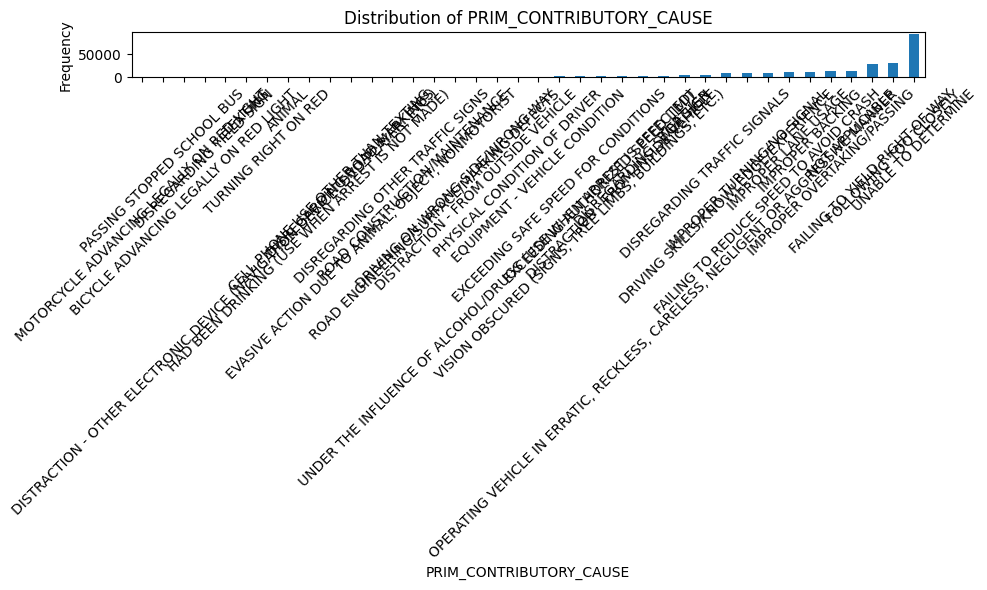

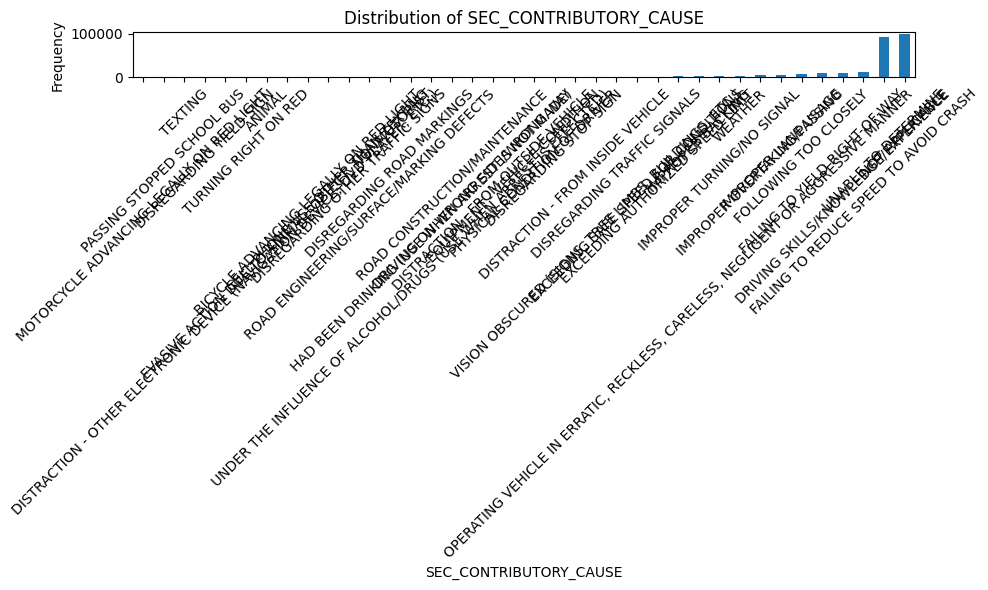

In [107]:
import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = [
    'CRASH_HOUR',
    'CRASH_DAY_OF_WEEK',
    'CRASH_MONTH',
    #'CRASH_DATE', #too many values
    'POSTED_SPEED_LIMIT',
    'TRAFFIC_CONTROL_DEVICE',
    'WEATHER_CONDITION',
    'LIGHTING_CONDITION',
    'FIRST_CRASH_TYPE',
    'TRAFFICWAY_TYPE',
    'ALIGNMENT',
    'ROADWAY_SURFACE_COND',
    'ROAD_DEFECT',
    'MOST_SEVERE_INJURY',
    'PRIM_CONTRIBUTORY_CAUSE',
    'SEC_CONTRIBUTORY_CAUSE'
]

# Plotting each column
for column in columns_to_plot:
    value_counts = crashes_df[column].value_counts().sort_values()
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

the conclusion that come from the graph are:
- the hours where most of the crashes happen is between 7 AM and 7 PM with a peak in the early afternoon (3PM to 5PM); one can see that 7AM and 7PM are the usual hours where people get in/out of work so it makes sense for more traffic.

- the days of the week do not impact much on the number of crashes

- there are more crashes during autumn/winter

- there is a very noticeable peak of incidents based on the speed limit, with special regards to the 30 limit, still all really relevant data is contained between 0 and 45

- other than when there are no controls the traffic signal and a very similar alternative such as the stop sign/flasher are the traffic control devices where most of the crashes happen

- the weather conditions have almost a contrary impact on the number of incidents, where clear weather means more crashes. most likely people are more attentive to their driving when the weather is not optimal

- the same thing that is valid for the weather condition is also valid for the lighting conditions, there are more crashes in the daylight than in the darkness/lighted road and all the other conditions combined

- there is a peak of crashes when the road trafficway type is not divided

- most of the accidents happen when the alignment of the road is straight and level (basically only that), but it is important to remember that the roads of Chicago don't change much in altitude (https://chatgpt.com/share/672beffe-678c-8003-9e93-e42a98c877dd (sources included)); maybe this column should be removed

- as previously noted, when the conditions are best the drivers make the most mistakes, in fact when the roadway surface conditions are dry, rather than wet, snowy, ice, sand and other, the drivers have the most crushes for lack of attention to the road. Can the features that have this similar distribution be aggregated?

- same as conditions of the surface also road defect get the same results.

### features that can be aggregated

- INJURIES_FATAL
- INJURIES_INCAPACITATING
- INJURIES_NON_INCAPACITATING
- INJURIES_REPORTED_NOT_EVIDENT
- INJURIES_NO_INDICATION
- INJURIES_UNKNOWN
after aggregating those INJURIES_TOTAL would be remvoed

the values in all those features space in values in weird ways but i would propose to aggregate all the values in them into one single value for each type and put them into a scale to keep an order for them

so maybe we would have
- INJURIES_UNKNOWN 0
- INJURIES_NO_INDICATION 1
- INJURIES_REPORTED_NOT_EVIDENT 2
- INJURIES_NON_INCAPACITATING 3
- INJURIES_INCAPACITATING 4
- INJURIES_FATAL 5

-------------------------

'CRASH_DATE' is an aggregation of: 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'?

-------------------------
search for other

### filling the values

need to find street direction since the similar named column in the vehicles dataset didnt yeld any good results (REMOVING FROM THE DATASET INSTEAD)

might be able to get LATITUDE, LONGITUDE and LOCATION using the infos in STREET_NAME (and viceversa for the single street name value present) (REMOVING BECAUSE BEAT_OF_OCCURRENCE INTEGRATES THEM ALL)

remember to check if the street name have a null value in them (just check for the frequency of the street names, they should all be different(?), so if there is one repeating it probably is a mock value)

In [108]:
print(crashes_df["STREET_NAME"].value_counts())

WESTERN AVE          7041
PULASKI RD           6165
CICERO AVE           5573
ASHLAND AVE          5544
HALSTED ST           4895
                     ... 
LOGAN SD                1
LOWER LA SALLE ST       1
133RD PL                1
OTSEGO AVE              1
KINZIE                  1
Name: STREET_NAME, Length: 1479, dtype: int64


In [109]:
# Filter the DataFrame for rows where STREET_NAME is 'WESTERN AVE'
western_ave_street_no_counts = crashes_df[crashes_df['STREET_NAME'] == 'WESTERN AVE']['STREET_NO'].value_counts()

# Display the counts
print(western_ave_street_no_counts)

5500     87
4700     82
7100     64
2600     59
6200     53
         ..
9305      1
10635     1
6541      1
6354      1
9509      1
Name: STREET_NO, Length: 2478, dtype: int64


everything seems regular

### correlation matrix

C:\Users\alex1\AppData\Local\Temp\ipykernel_27848\283732973.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = crashes_df.corr()


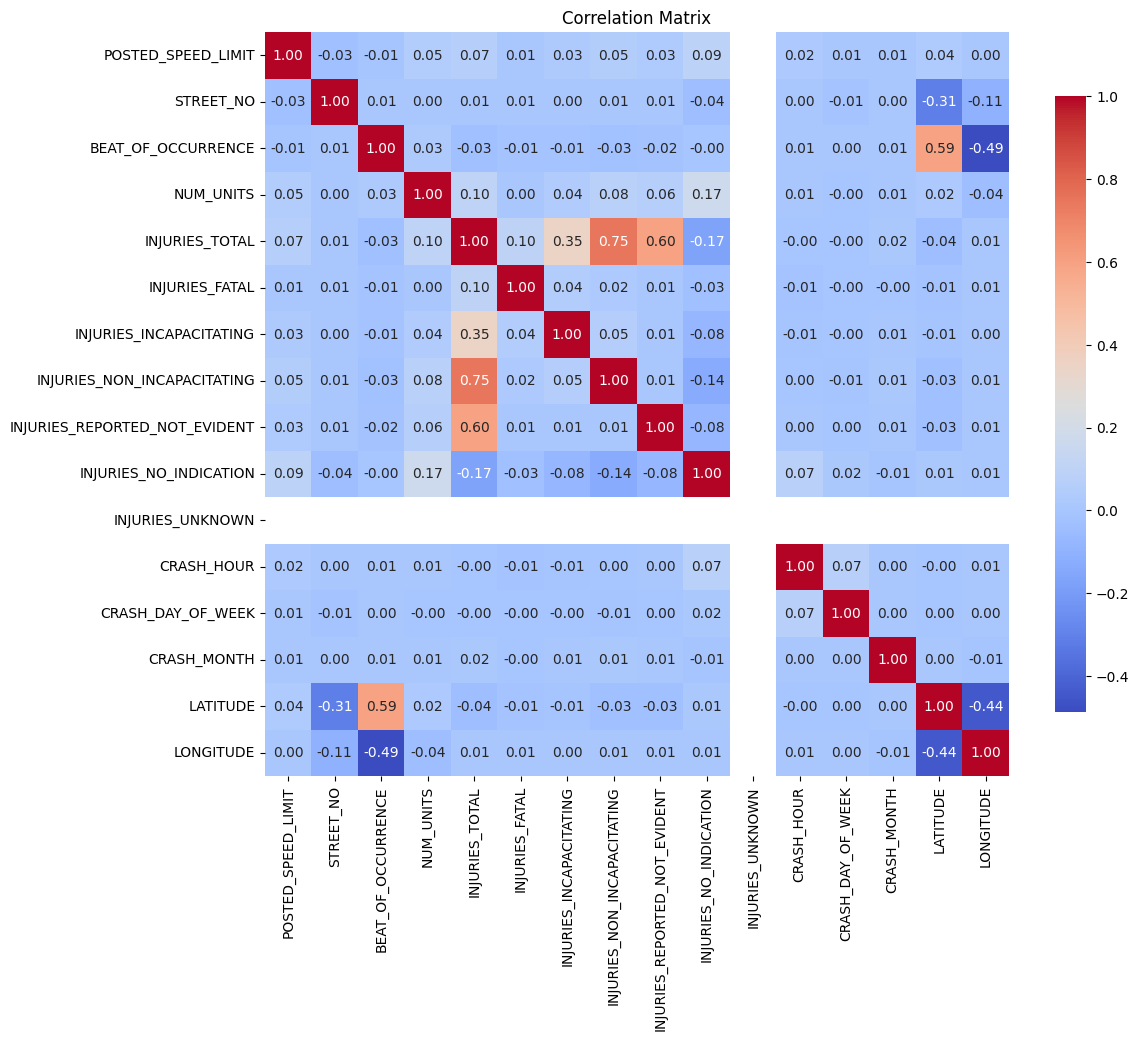

In [110]:
# Add this code to plot a correlation matrix
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = crashes_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title
plt.title('Correlation Matrix')
plt.show()

so we find that:
- most of the injuries are non incapacitating
- there is a strong correlation between BEAT_OF_OCCURRENCE and LATITUDE and LONGITUDE
- for the rest of the features there is not that much correlation, even tho, if the dataset was to be unified it would be interesting to check for the correlation matrix of all the dataset togheter

BEAT_OF_OCCURRENCE is described as (in https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data):
	
Chicago Police Department Beat ID. Boundaries available at https://data.cityofchicago.org/d/aerh-rz74 

as described by gpt:

In Chicago, "police beats" are specific geographic areas within each police district. Each beat is assigned a dedicated police team responsible for routine patrols and responding to incidents. This organization allows officers to become familiar with the communities within their beat, enhancing local policing efforts and accountability. The City of Chicago’s data portal provides boundaries and GIS data for these police beats.

does this mean that we can drop LONGITUDE, LATITUDE and LOCATION? (REMEMBER THAT THERE ARE 4 MISSING VALUES FOR BEAT_OF_OCCURRENCE)

### data type check

In [111]:
for col in crashes_df.columns:
    print(f"Column: {col}")
    print(f"Data Type: {crashes_df[col].dtype}")
    print(f"Unique Values: {crashes_df[col].unique()}")
    print("_______________________________________________________")


Column: RD_NO
Data Type: object
Unique Values: ['JC113649' 'JC113627' 'JC113637' ... 'HZ164689' 'HZ122950' 'JB442550']
_______________________________________________________
Column: CRASH_DATE
Data Type: object
Unique Values: ['01/12/2019 12:01:00 AM' '01/11/2019 11:36:00 PM'
 '01/11/2019 11:31:00 PM' ... '02/24/2014 07:45:00 PM'
 '01/21/2014 07:40:00 AM' '01/18/2014 06:14:00 PM']
_______________________________________________________
Column: POSTED_SPEED_LIMIT
Data Type: int64
Unique Values: [30 15 35 40  5 25 10 20  0 45  3 39 55  1 60 70 50  2 22  9 24 14  7 33
 32 36 65 23 34  4 26  6 63 18 12 38 99]
_______________________________________________________
Column: TRAFFIC_CONTROL_DEVICE
Data Type: object
Unique Values: ['NO CONTROLS' 'STOP SIGN/FLASHER' 'TRAFFIC SIGNAL' 'OTHER' 'UNKNOWN'
 'LANE USE MARKING' 'OTHER REG. SIGN' 'POLICE/FLAGMAN'
 'OTHER WARNING SIGN' 'RAILROAD CROSSING GATE' 'YIELD' 'DELINEATORS'
 'SCHOOL ZONE' 'OTHER RAILROAD CROSSING' 'NO PASSING']
_________________

need to check if there are digits in the RD_NO column

In [112]:
crashes_df["RD_NO"]

0         JC113649
1         JC113627
2         JC113637
3         JC113630
4         JC113604
            ...   
257920    HY498942
257921    HZ400518
257922    HZ164689
257923    HZ122950
257924    JB442550
Name: RD_NO, Length: 257925, dtype: object

the values seem to have a pattern, let's check if there is any value that doesn't match this pattern

In [113]:
crashes_df[~crashes_df['RD_NO'].str.match(r'^[A-Z]{2}\d{6}$')]["RD_NO"]

235089    hz273623
246076    hz125235
Name: RD_NO, dtype: object

the only 2 license plate that are not exactly matching the format are those 2 with lower case letters

_____________________

need to check any weird value (does not match the formatting of the others) in LOCATION

In [114]:
crashes_df["LOCATION"][0]

'POINT (-87.716439109795 41.894718028422)'

since all the values, at a first look, in the location column (except for the nan ones) are a string with this format
- 'POINT (-87.716439109795 41.894718028422)'

let's check if there are any different values

In [119]:
# Check for values that do not match the expected format
not_nan_locations = crashes_df.dropna(subset=['LOCATION'])
not_nan_locations[~not_nan_locations['LOCATION'].str.match(r"^POINT \(-?\d+\.\d+ -?\d+\.\d+\)$")]["LOCATION"]

Series([], Name: LOCATION, dtype: object)

there is no value that doesnt match the location that was required

_______________



need to check if there are not date values in
- CRASH_DATE,
- DATE_POLICE_NOTIFIED

In [129]:
# Check if all values in CRASH_DATE match the pattern
crash_date_pattern = r"^\d{2}/\d{2}/\d{4} \d{1,2}:\d{2}:\d{2} [AP]M$"
crash_date_check = crashes_df['CRASH_DATE'].str.match(crash_date_pattern)

# Check if all values in DATE_POLICE_NOTIFIED match the pattern
date_police_notified_pattern = r"^\d{2}/\d{2}/\d{4} \d{1,2}:\d{2}:\d{2} [AP]M$"
date_police_notified_check = crashes_df['DATE_POLICE_NOTIFIED'].str.match(date_police_notified_pattern)

# Print results
print("CRASH_DATE matches pattern:", crash_date_check.all())
print("DATE_POLICE_NOTIFIED matches pattern:", date_police_notified_check.all())

CRASH_DATE matches pattern: True
DATE_POLICE_NOTIFIED matches pattern: True



(checked manually all the other types in the list in the output above and everything matches for sure (few values), other then the report one above which we're gonna check now)

columns that are float64 but might aswell be int64

In [45]:
float_columns = crashes_df.select_dtypes(include=['float64']).columns.tolist()

now we convert the float to int when the values in the column are actually integers

In [46]:
for col in float_columns:
    # Check if the column contains any NaN or infinite values
    if crashes_df[col].isnull().any() or np.isinf(crashes_df[col]).any():
        print(f"Column {col} contains NaN or infinite values, should skip conversion.")
        continue  # Skip this column if it has NaN or infinite values


    # Check if all values are whole numbers
    if (crashes_df[col] == crashes_df[col].astype('int')).all():
        print(f"Column {col} can be converted to int64.")
        

Column BEAT_OF_OCCURRENCE contains NaN or infinite values, should skip conversion.
Column NUM_UNITS can be converted to int64.
Column INJURIES_TOTAL can be converted to int64.
Column INJURIES_FATAL can be converted to int64.
Column INJURIES_INCAPACITATING can be converted to int64.
Column INJURIES_NON_INCAPACITATING can be converted to int64.
Column INJURIES_REPORTED_NOT_EVIDENT can be converted to int64.
Column INJURIES_NO_INDICATION can be converted to int64.
Column INJURIES_UNKNOWN can be converted to int64.
Column LATITUDE contains NaN or infinite values, should skip conversion.
Column LONGITUDE contains NaN or infinite values, should skip conversion.


### weird values

In [5]:
crashes_df.columns

Index(['RD_NO', 'CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
       'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'LOCATION'],
      dtype='object')

In [6]:
# Select numeric columns
numeric_columns = crashes_df.select_dtypes(include=[np.number]).columns

# Iterate over each numeric column and sort values from max to min
for col in numeric_columns:
    print(f"Sorted values for {col} (max to min):")
    sorted_values = crashes_df[col].sort_values(ascending=False)
    print(sorted_values)
    print("_______________________________________________________")

Sorted values for POSTED_SPEED_LIMIT (max to min):
255398    99
255744    99
255895    99
256615    99
256611    99
          ..
96141      0
251183     0
37950      0
37942      0
176317     0
Name: POSTED_SPEED_LIMIT, Length: 257925, dtype: int64
_______________________________________________________
Sorted values for STREET_NO (max to min):
228158    451100
227882     34453
256953     13799
4204       13799
90721      13780
           ...  
9705           1
252841         1
150642         1
54095          1
180788         0
Name: STREET_NO, Length: 257925, dtype: int64
_______________________________________________________
Sorted values for BEAT_OF_OCCURRENCE (max to min):
151238    2535.0
208131    2535.0
201192    2535.0
76384     2535.0
217606    2535.0
           ...  
13476      111.0
204846       NaN
206421       NaN
216083       NaN
216644       NaN
Name: BEAT_OF_OCCURRENCE, Length: 257925, dtype: float64
_______________________________________________________
Sorted values

no weird values in numeric columns

In [9]:
non_numeric_columns = [item for item in list(crashes_df.columns) if item not in numeric_columns]
non_numeric_columns

['RD_NO',
 'CRASH_DATE',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'REPORT_TYPE',
 'CRASH_TYPE',
 'DATE_POLICE_NOTIFIED',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE',
 'STREET_DIRECTION',
 'STREET_NAME',
 'MOST_SEVERE_INJURY',
 'LOCATION']

In [12]:
for col in non_numeric_columns:
    print(f"Unique values in {col}:\n")
    print(crashes_df[col].value_counts())
    print("_______________________________________________________")

Unique values in RD_NO:

JC113649    1
JA338203    1
JA338376    1
JA338333    1
JA338644    1
           ..
JB233132    1
JB233590    1
JB233252    1
JB233122    1
JB442550    1
Name: RD_NO, Length: 257925, dtype: int64
_______________________________________________________
Unique values in CRASH_DATE:

11/10/2017 10:30:00 AM    27
11/10/2017 10:00:00 AM    20
09/04/2018 08:00:00 AM    16
01/25/2018 08:00:00 AM    15
10/10/2018 03:30:00 PM    15
                          ..
02/15/2018 04:32:00 PM     1
02/15/2018 04:40:00 PM     1
02/15/2018 04:50:00 PM     1
02/15/2018 05:03:00 PM     1
01/18/2014 06:14:00 PM     1
Name: CRASH_DATE, Length: 166465, dtype: int64
_______________________________________________________
Unique values in TRAFFIC_CONTROL_DEVICE:

NO CONTROLS                148894
TRAFFIC SIGNAL              72072
STOP SIGN/FLASHER           24877
UNKNOWN                      8312
OTHER                        1441
LANE USE MARKING             1080
YIELD                    

no weird values in the other columns, still need to check the date ones

In [10]:
dates_columns = ["CRASH_DATE", "DATE_POLICE_NOTIFIED"]

0         01/12/2019 12:01:00 AM
1         01/11/2019 11:36:00 PM
2         01/11/2019 11:31:00 PM
3         01/11/2019 11:22:00 PM
4         01/11/2019 11:08:00 PM
                   ...          
257920    11/11/2014 08:00:00 PM
257921    08/20/2014 04:50:00 PM
257922    02/24/2014 07:45:00 PM
257923    01/21/2014 07:40:00 AM
257924    01/18/2014 06:14:00 PM
Name: CRASH_DATE, Length: 257925, dtype: object

In [15]:
# Convert the 'CRASH_DATE' column to datetime
crashes_df['DATE_POLICE_NOTIFIED_datetime'] = pd.to_datetime(crashes_df['DATE_POLICE_NOTIFIED'], format='%m/%d/%Y %I:%M:%S %p')

# Sort the dates from max to min
df_sorted2 = crashes_df.sort_values(by='DATE_POLICE_NOTIFIED_datetime', ascending=False)

# Display the sorted DataFrame
df_sorted2["CRASH_DATE_datetime"]

2        2019-01-11 23:31:00
0        2019-01-12 00:01:00
44       2019-01-11 18:00:00
3        2019-01-11 23:22:00
106      2019-01-11 12:15:00
                 ...        
257888   2015-08-04 10:00:00
257890   2015-08-04 08:00:00
257891   2015-08-04 05:00:00
257892   2015-08-03 18:37:00
257901   2015-07-25 20:40:00
Name: CRASH_DATE_datetime, Length: 257925, dtype: datetime64[ns]

In [16]:
# Convert the 'CRASH_DATE' column to datetime
crashes_df['CRASH_DATE_datetime'] = pd.to_datetime(crashes_df['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')

# Sort the dates from max to min
df_sorted = crashes_df.sort_values(by='CRASH_DATE_datetime', ascending=False)

# Display the sorted DataFrame
df_sorted["CRASH_DATE_datetime"]

0        2019-01-12 00:01:00
1        2019-01-11 23:36:00
2        2019-01-11 23:31:00
3        2019-01-11 23:22:00
4        2019-01-11 23:08:00
                 ...        
257920   2014-11-11 20:00:00
257921   2014-08-20 16:50:00
257922   2014-02-24 19:45:00
257923   2014-01-21 07:40:00
257924   2014-01-18 18:14:00
Name: CRASH_DATE_datetime, Length: 257925, dtype: datetime64[ns]

No weird dates found